In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
mkdir CNN

In [31]:
%cd /content/drive/MyDrive/CNN

/content/drive/MyDrive/CNN


In [3]:
import os
# os.environ['KAGGLE_USERNAME'] = "nandhakumar5321" # username from the json file
# os.environ['KAGGLE_KEY'] = "cd3f45b0f739ad624b963b7c66bce959" # key from the json file
# !kaggle datasets download -d sachinkumar413/monkeypox-images-dataset # api copied from kaggle

In [ ]:
from zipfile import ZipFile

file_name = "/content/drive/MyDrive/CNN/archive (4).zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
import warnings
import os
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/drive/MyDrive/CNN/dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/drive/MyDrive/CNN/dataset"))
file_count = len(files)
# print(file_count)

['chickenpox', 'cowpox', 'healthy', 'measles', 'monkeypox', 'smallpox']


In [5]:
# Make new base directory
original_dataset_dir = '/content/drive/MyDrive/CNN/'
base_dir = '/content/drive/MyDrive/CNN/datapox'
os.mkdir(base_dir)

In [6]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)


train_helmet_dir = os.path.join(train_dir, 'Helmet')
os.mkdir(train_helmet_dir)

train_non-helmet_dir = os.path.join(train_dir, 'non-helmet')
os.mkdir(train_non-helmet_dir)

train_triples_dir = os.path.join(train_dir, 'Triples')
os.mkdir(train_triples_dir)

train_License-plate_dir = os.path.join(train_dir, 'License-plate')
os.mkdir(train_License-plate_dir)

train_person_dir = os.path.join(train_dir, 'person')
os.mkdir(train_person_dir)






In [7]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [8]:
HELMET_SOURCE_DIR = '/content/drive/MyDrive/CNN/dataset/HELMET/'
TRAINING_HELMET_DIR = '/content/drive/MyDrive/CNN/data/train/HELMET/'
VALID_HELMET_DIR = '/content/drive/MyDrive/CNN/data/validation/HELMET/'

NON-HELMET_SOURCE_DIR = '/content/drive/MyDrive/CNN/dataset/NON-HELMET/'
TRAINING_NON-HELMET_DIR = '/content/drive/MyDrive/CNN/data/train/NON-HELMET/'
VALID_NON-HELMET_DIR = '/content/drive/MyDrive/CNN/data/validation/NON-HELMET/'

TRIPLES_SOURCE_DIR = '/content/drive/MyDrive/CNN/dataset/TRIPLES/'
TRAINING_TRIPLES_DIR = '/content/drive/MyDrive/CNN/data/train/TRIPLES/'
VALID_TRIPLES_DIR = '/content/drive/MyDrive/CNN/data/validation/TRIPLES/'

LICENSE-PLATE_SOURCE_DIR = '/content/drive/MyDrive/CNN/dataset/LICENSE-PLATE/'
TRAINING_LICENSE-PLATE_DIR = '/content/drive/MyDrive/CNN/data/train/LICENSE-PLATE/'
VALID_LICENSE-PLATE_DIR = '/content/drive/MyDrive/CNN/data/validation/LICENSE-PLATE/'

PERSON_SOURCE_DIR = '/content/drive/MyDrive/CNN/dataset/PERSON/'
TRAINING_PERSON_DIR = '/content/drive/MyDrive/CNN/data/train/PERSON/'
VALID_PERSON_DIR = '/content/drive/MyDrive/CNN/data/validation/PERSON/'



In [9]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(HELMET_SOURCE_DIR, TRAINING_HELMET_DIR, VALID_HELMET_DIR, split_size)
split_data(NON-HELMET_SOURCE_DIR, TRAINING_NON-HELMET_DIR, VALID_NON-HELMET_DIR, split_size)
split_data(TRIPLES_SOURCE_DIR, TRAINING_TRIPLES_DIR, VALID_TRIPLES_DIR, split_size)
split_data(LICENSE-PLATE_SOURCE_DIR, TRAINING_LICENSE-PLATE_DIR, VALID_LICENSE-PLATE_DIR, split_size)
split_data(PERSON_SOURCE_DIR, TRAINING_PERSON_DIR, VALID_PERSON_DIR, split_size)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['Helmet', 'Non-Helmet', 'Triples', 'Licens-plate', 'Person']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/CNN/data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in ['helmet', 'non-helmet', 'triples', 'license-plate', 'person']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/CNN/data/train/'+i+'/'))))

In [ ]:
image_folder = ['helmet', 'non-helmet', 'triples', 'license-plate', 'person']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/CNN/data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [ ]:
for i in ['helmet', 'non-helmet', 'triples', 'license-plate', 'plate']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/CNN/data/validation/'+i+'/'))))

In [44]:
img_width=416; img_height=416
batch_size=16

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/CNN/datapox/train'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

In [ ]:
VALIDATION_DIR = '/content/drive/MyDrive/CNN/data/validation'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

In [47]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/CNN/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [49]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [50]:

























































































































































































  ++++++++++++++++++++++++++++++++++++++++history = model.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/10
680/680 [==============================] - ETA: 0s - loss: 2.8697 - accuracy: 0.3289

680/680 [==============================] - 518s 748ms/step - loss: 2.8697 - accuracy: 0.3289 - val_loss: 1.5804 - val_accuracy: 0.3411
Epoch 2/10
680/680 [==============================] - ETA: 0s - loss: 1.5886 - accuracy: 0.3364

680/680 [==============================] - 501s 736ms/step - loss: 1.5886 - accuracy: 0.3364 - val_loss: 1.5854 - val_accuracy: 0.3411
Epoch 3/10
680/680 [==============================] - ETA: 0s - loss: 1.5878 - accuracy: 0.3376

680/680 [==============================] - 500s 735ms/step - loss: 1.5878 - accuracy: 0.3376 - val_loss: 1.5838 - val_accuracy: 0.3411
Epoch 4/10
680/680 [==============================] - ETA: 0s - loss: 1.5906 - accuracy: 0.3358

680/680 [==============================] - 498s 732ms/step - loss: 1.5906 - accuracy: 0.3358 - val_loss: 1.5816 - val_accuracy: 0.3411
Epoch 5/10
680/680 [==============================] - ETA: 0s - loss: 1.5832 - accuracy: 0.3378

680/680 [==============================] - 495s 728ms/step - loss: 1.5832 - accuracy: 0.3378 - val_loss: 1.5807 - val_accuracy: 0.3411
Epoch 6/10
680/680 [==============================] - ETA: 0s - loss: 1.5825 - accuracy: 0.3396

680/680 [==============================] - 497s 730ms/step - loss: 1.5825 - accuracy: 0.3396 - val_loss: 1.5810 - val_accuracy: 0.3411
Epoch 7/10
680/680 [==============================] - ETA: 0s - loss: 1.5835 - accuracy: 0.3378

680/680 [==============================] - 494s 726ms/step - loss: 1.5835 - accuracy: 0.3378 - val_loss: 1.5804 - val_accuracy: 0.3411
Epoch 8/10
680/680 [==============================] - ETA: 0s - loss: 1.5835 - accuracy: 0.3383

680/680 [==============================] - 494s 726ms/step - loss: 1.5835 - accuracy: 0.3383 - val_loss: 1.5814 - val_accuracy: 0.3411
Epoch 9/10
680/680 [==============================] - ETA: 0s - loss: 1.5826 - accuracy: 0.3406

680/680 [==============================] - 494s 727ms/step - loss: 1.5826 - accuracy: 0.3406 - val_loss: 1.5807 - val_accuracy: 0.3411
Epoch 10/10
680/680 [==============================] - ETA: 0s - loss: 1.5824 - accuracy: 0.3399

680/680 [==============================] - 495s 728ms/step - loss: 1.5824 - accuracy: 0.3399 - val_loss: 1.5807 - val_accuracy: 0.3411


In [51]:
model.save('/content/drive/MyDrive/CNN/dest.h5')

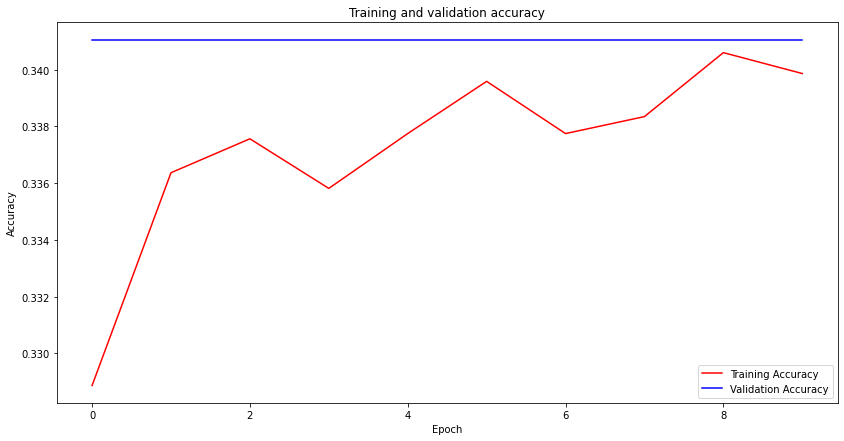

In [52]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

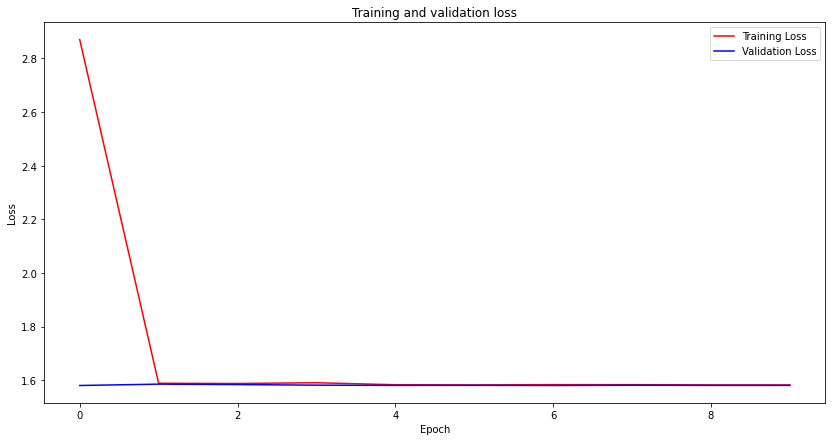

In [53]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')